### Examine the accuracy in the amplitude of mock light curves simulated by `Celerite`

<br>**Author(s):** Weixiang Yu
<br>**Last run:** 07-10-20
<br>**Short description:** This notebook will try to explore/validate `celerite` simulated mock CARMA light curves from the perspective of the amplitude. In short, standard deviation of a simulated light curve should match the input value the amplitude of a CARMA process.

## 0. Setup

In [1]:
# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys

# see if local stores mpl style, else use from src
try:
    plt.style.use('yu_basic')
except:
    mpl.rc_file('https://raw.githubusercontent.com/ywx649999311/project_template'
                '/master/%7B%7Bcookiecutter.project_name%7D%7D/src/vis/mpl/yu_basic.rc')
    
pd.set_option('display.max_columns', 999)
%matplotlib inline

import dask

In [2]:
# import CARMA celerite term
from agntk.carma.CARMATerm import *
from celerite import GP

## 1. Test Mock LC
### 1.1 Mock DRW LC
In this section, we will simulate a collection of DRW light curves using a grid placed in the parameter space of $\tau$ and the standard deviate ($\sigma_{DRW}^{2} = \frac{\tau\sigma^{2}}{2}$) of the simulated light curves. We will uniformly draw parameters from 10 days < $\tau$ < 365 days and 0.05 mag < $\sigma_{DRW}$ < 0.35 mag. The simulated light curves will have a 1 day cadence and 10 years baseline.

#### 1.1.1 First try simulating one LC

In [3]:
# define GP model
kernel = DRW_term(np.log(0.35), np.log(100))
gp = GP(kernel)

In [27]:
# must do compute before simulate LC
t = np.linspace(0, 3650, 3650)
yerr = np.random.normal(0, 1e-5, 3650) # give very tiny error
gp.compute(t, yerr)

# simulate LC
y = gp.sample()
print(f'Percentage error in the std of the simulated LC: {(np.std(y)-0.35)/0.35}')

Percentage error in the std of the simulated LC: 0.32817554522093784


<span style='color:red'>It is still likely to get a simulated LC that deviates far from the desired process, now we will try to simulate 100 LCs and make a histogram of the pecentage error in the standard deviation.</span>

In [31]:
all_std = []
for i in range(100):
    all_std.append(np.std(gp.sample()))

percent_err = 100*(np.array(all_std) - 0.35)/0.35

Text(0.5, 0, 'Percentage Error')

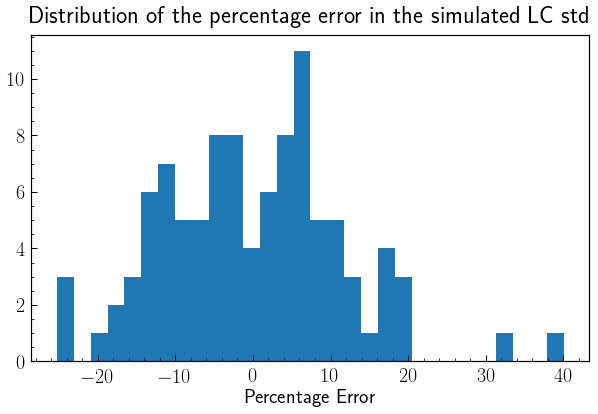

In [36]:
fig = plt.figure(figsize=(10,6))
_ = plt.hist(percent_err)
plt.title('Distribution of the percentage error in the simulated LC std')
plt.xlabel('Percentage Error')

<span style='color:red'>The __conclusion__ is that light curves simulated by `celerite` will exhibit deviations from the desired ones in a way similar to light curves simulated by `Kali`. A walk around would be put the simulating process inside a if statement and exit the closure only when the standard deviation of the simulated process lie within a certain interval of the desired number.</span>

Text(0.5, 1.0, 'Sample Simulated DRW LC')

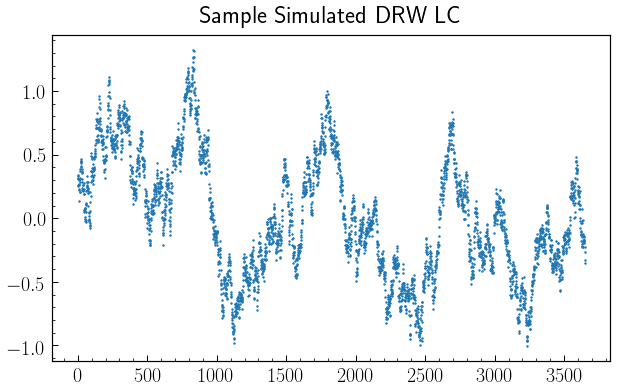

In [39]:
# # plot simulated LC
fig = plt.figure(figsize=(10,6))
plt.scatter(t, y, s=2)
plt.title('Sample Simulated DRW LC')